# `20180826a` - Checks on nCycles - if it can go over 0xFF

In [16]:
#!/usr/bin/python
import spidev
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Data acquired


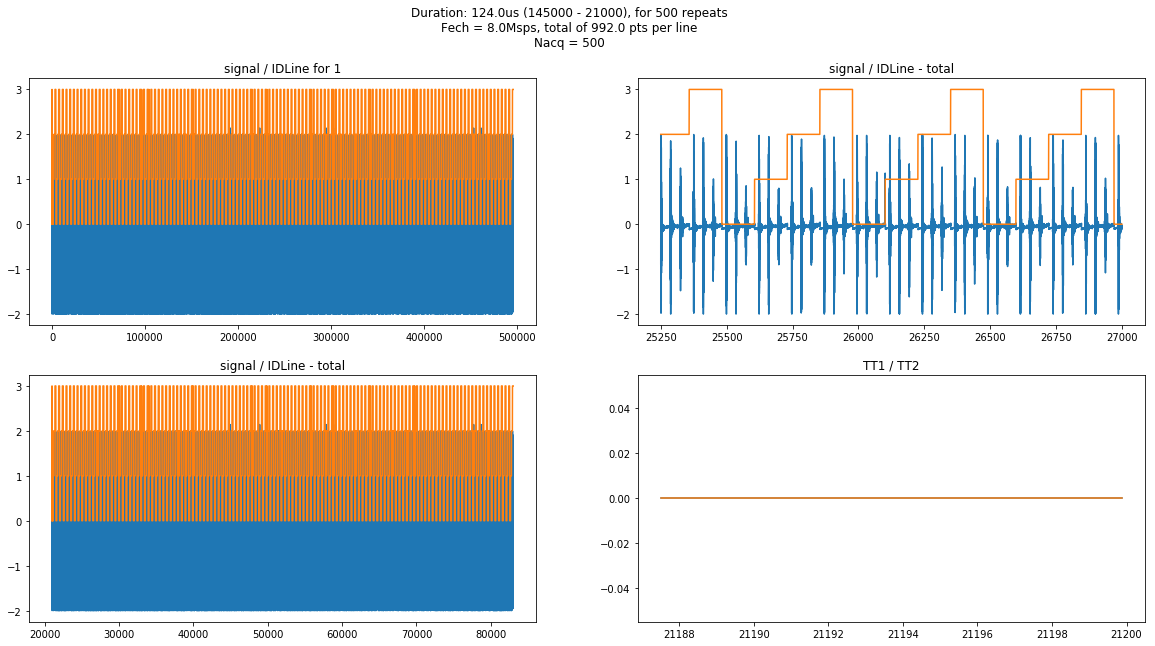

In [3]:
for FILE in ["data/20180826a-1.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =34000
    ax2.plot(x.t[A:A+14000],x.tmp[A:A+14000])
    ax2.plot(x.t[A:A+14000],x.IDLine[A:A+14000])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

# Getting the full clean image

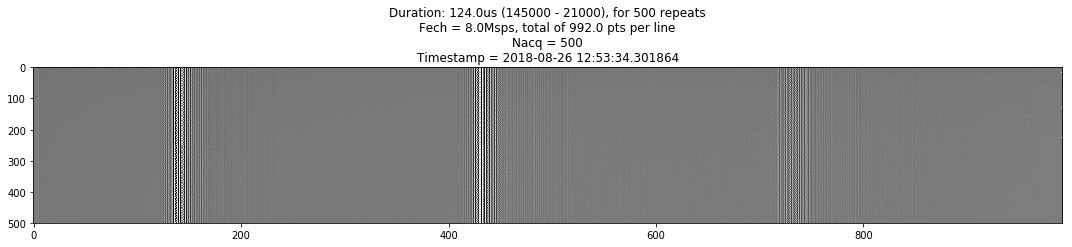

In [4]:
CleanImage = x.mk2DArray()

In [23]:
np.shape(CleanImage)

(500, 992)

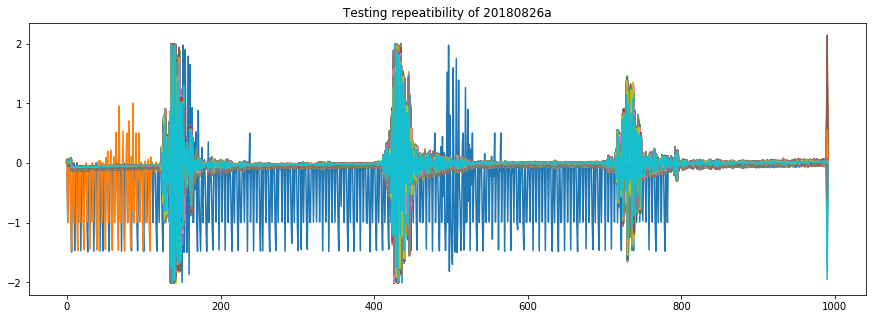

In [21]:
plt.figure(figsize = (15,5))
plt.title("Testing repeatibility of "+x.iD)
for k in range(500):
    plt.plot(x.TwoDArray[k])
plt.show()
FileName = "images/_"+x.iD+"-"+str(x.N)+"-"+str(2200)+"-"+str(2600)+".jpg"
plt.savefig(FileName)

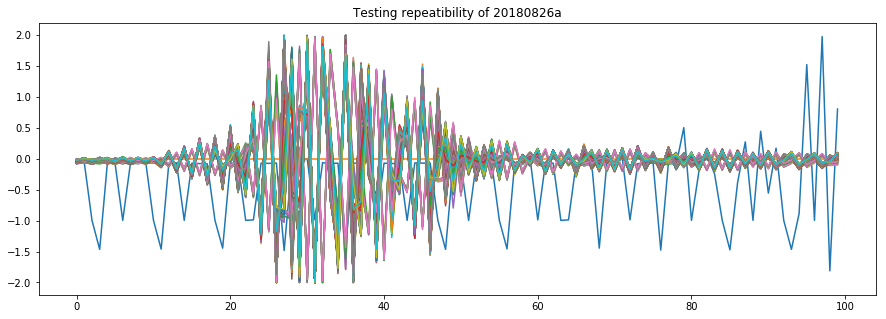

In [19]:
plt.figure(figsize = (15,5))
plt.title("Testing repeatibility of "+x.iD)
for k in range(500):
    plt.plot(x.TwoDArray[k][400:500])
plt.show()
FileName = "images/detailed_"+x.iD+"-"+str(x.N)+"-"+str(2200)+"-"+str(2600)+".jpg"
plt.savefig(FileName)

In [22]:
MetaDataImg("matty,loftus",x.iD,"other",x.description)

./images/alllines_20180826a-1-2200-2600.jpg done
./images/_20180826a-1-2200-2600.jpg done
./images/detailed_20180826a-1-2200-2600.jpg done
./images/20180826a-1-all.jpg done
./images/2DArray_20180826a.jpg done
